# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Importing the dataset

### About Dataset
#### Description:
The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.

#### Variables:
Hours Studied: The total number of hours spent studying by each student.

Previous Scores: The scores obtained by students in previous tests.

Sleep Hours: The average number of hours of sleep the student had per day.

Sample Question Papers Practiced: The number of sample question papers the student practiced.

##### Target Variable:
Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.


In [2]:
data = pd.read_csv("Student_Performance.csv")

# Data Analysis

In [3]:
data.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91
1,4,82,4,2,65
2,8,51,7,2,45
3,5,52,5,2,36
4,7,75,8,5,66


In [4]:
print("Shape of dataframe df: {}".format(data.shape))

Shape of dataframe df: (10000, 5)


In [5]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   Hours Studied                     10000 non-null  int64
 1   Previous Scores                   10000 non-null  int64
 2   Sleep Hours                       10000 non-null  int64
 3   Sample Question Papers Practiced  10000 non-null  int64
 4   Performance Index                 10000 non-null  int64
dtypes: int64(5)
memory usage: 390.8 KB


### Checking for null values.

In [7]:
print("Number of missing data in the dataframe:",data.isnull().sum().sum())

Number of missing data in the dataframe: 0


# Relationship between Features and Response

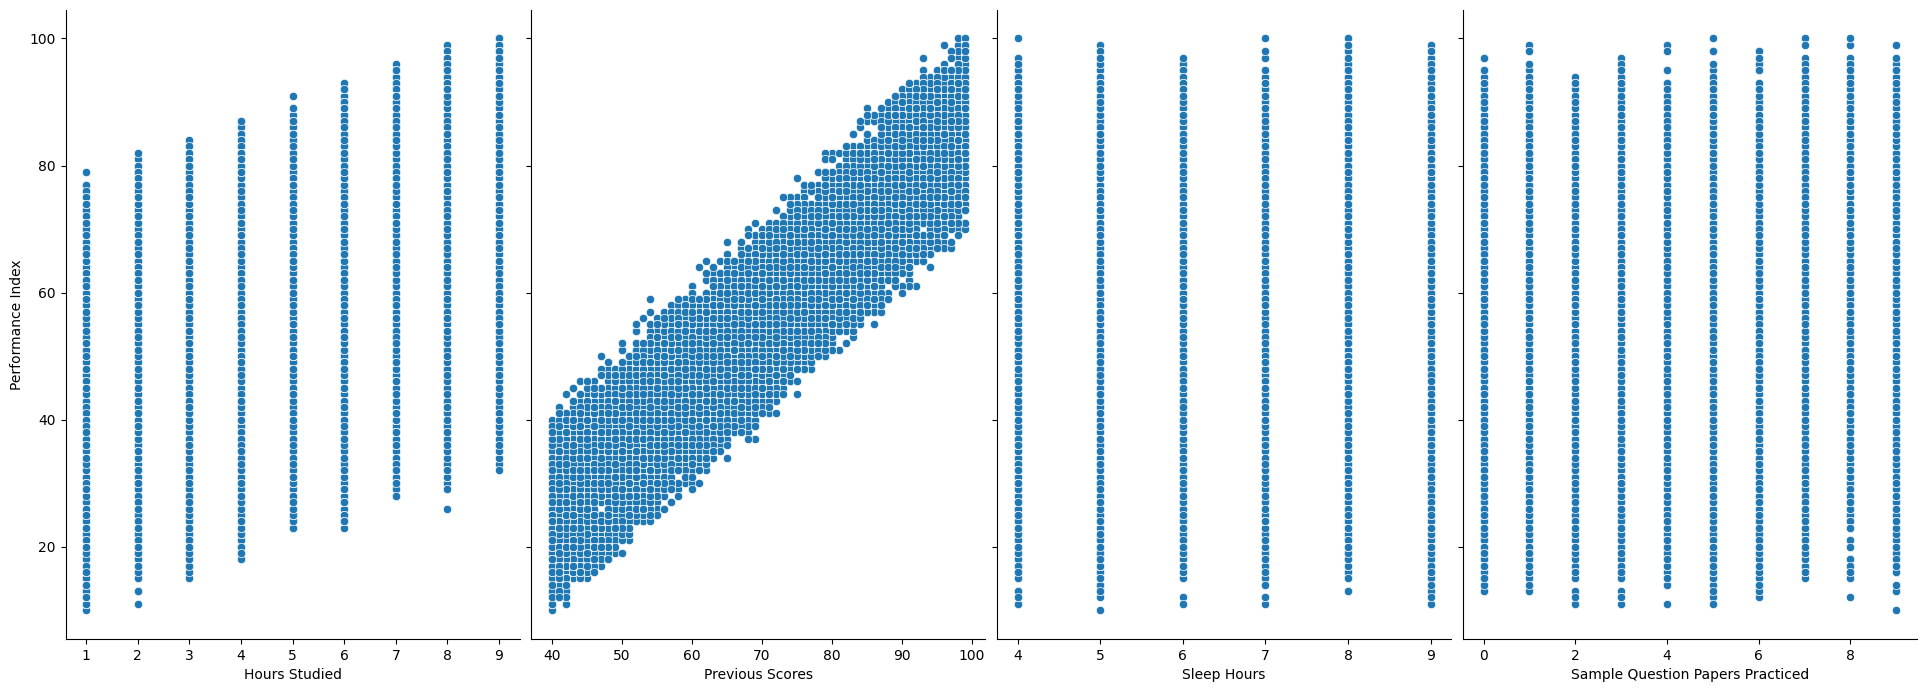

In [8]:
sns.pairplot(data,x_vars=['Hours Studied','Previous Scores','Sleep Hours','Sample Question Papers Practiced'],y_vars='Performance Index',height=7,aspect=0.7)

# Correlation heat map

<Axes: >

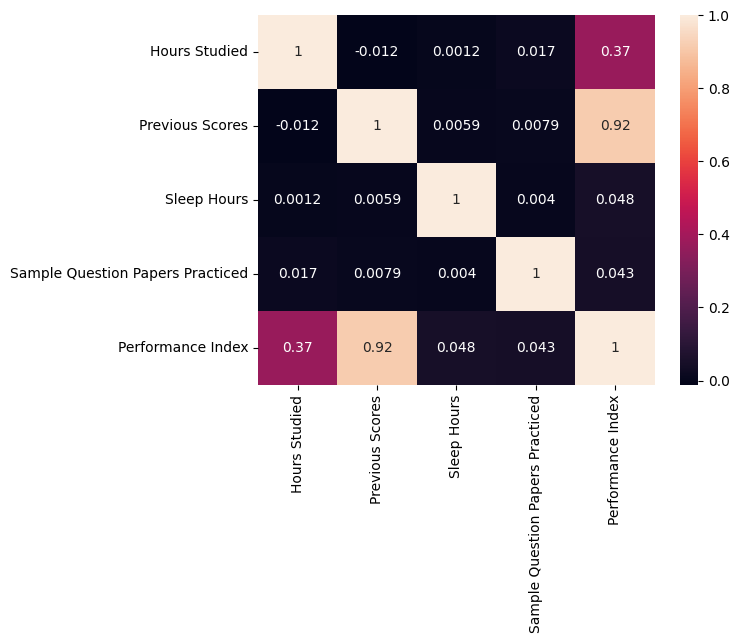

In [10]:
sns.heatmap(data.corr(),annot=True)

# Select the predictor and target variables

In [11]:
x = data.iloc[:,0:4]

y = data.iloc[:,-1]

In [12]:
x

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5
...,...,...,...,...
9995,1,49,4,2
9996,7,64,8,5
9997,6,83,8,5
9998,9,97,7,0


In [13]:
y

0       91
1       65
2       45
3       36
4       66
        ..
9995    23
9996    58
9997    74
9998    95
9999    64
Name: Performance Index, Length: 10000, dtype: int64

# Create separate train and test sets

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state = 9)

In [15]:
x_train.shape, y_train.shape

((7000, 4), (7000,))

In [16]:
x_test.shape, y_test.shape

((3000, 4), (3000,))

## Feature Scaling

In [17]:
# Feature Scaling - I use the StandardScaler from sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Fit the Linear Regression model

In [18]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

# Predicting the results

In [19]:
# Predict on the test data set
y_pred = lr.predict(x_test)

In [20]:
y_pred

array([74.21511424, 77.89722616, 30.16506148, ..., 84.16053185,
       70.87100885, 25.51998819])

## Model slope and intercept terms

In [21]:
print("Number of coefficients:", len(lr.coef_))

print("Estimated coefficients: {}".format(lr.coef_))

print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 4
Estimated coefficients: [ 7.41768932 17.61318848  0.80753766  0.54817362]
Estimated intercept: 55.38042857142857


#  Evaluate model performance

In [22]:
print("R2 Score value: {:.2f}".format(r2_score(y_test, y_pred)))

R2 Score value: 0.99


In [23]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 2.04


Text(0.5, 1.0, 'Student_Performance_Data')

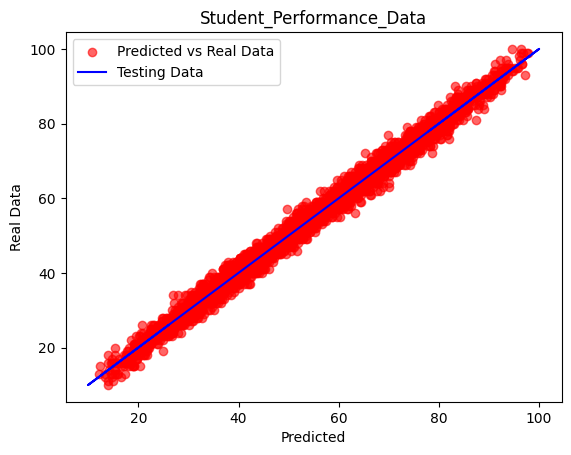

In [24]:
#plt.scatter(X_train, y_train, color = "green", label = "Traning Data")
plt.scatter(y_pred, y_test, color = "red", label = "Predicted vs Real Data",alpha = 0.6)
plt.plot(y_test,y_test,color = "blue",label = "Testing Data")
plt.legend()
plt.xlabel("Predicted")
plt.ylabel("Real Data")
plt.title("Student_Performance_Data")

In [25]:
joblib.dump(lr,"Student_Performance.joblib")

['Student_Performance.joblib']